In [1]:
pip install google.colab

     |████████████████████████████████| 72 kB 732 kB/s             
  Preparing metadata (setup.py) ... - \ done
     |████████████████████████████████| 64 kB 1.9 MB/s             
     |████████████████████████████████| 104 kB 42.7 MB/s            
     |████████████████████████████████| 758 kB 50.8 MB/s            
     |████████████████████████████████| 8.0 MB 22.7 MB/s            
     |████████████████████████████████| 10.1 MB 48.0 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 57 kB 4.4 MB/s             
     |████████████████████████████████| 484 kB 73.1 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 245 kB 67.1 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 118 kB 66.2 MB/s            
     |████████████████████████████████| 58 kB 4.8 MB/s             
     |████████████████████████████████| 133 kB 74.5 MB/s    

In [2]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


/opt/conda/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [3]:
path = '../input/modelo-yolo/cfg/yolov4.cfg' 

In [4]:
labels_path = os.path.sep.join(['../input/modelo-yolo/cfg', 'coco.names'])   
labels_path

'../input/modelo-yolo/cfg/coco.names'

In [5]:
LABELS = open(labels_path).read().strip().split('\n')
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
len(LABELS)

80

In [7]:
weights_path = os.path.sep.join(['../input/modelo-yolo', 'yolov4.weights'])
config_path = os.path.sep.join(['../input/modelo-yolo/cfg', 'yolov4.cfg'])
weights_path, config_path

('../input/modelo-yolo/yolov4.weights', '../input/modelo-yolo/cfg/yolov4.cfg')

In [8]:
net = cv2.dnn.readNet(config_path, weights_path)

In [9]:
net

<dnn_Net 0x7f201206dc30>

In [10]:
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype='uint8')  
print(COLORS)

[[102  56 250]
 [183  18 213]
 [ 57 183  18]
 [232 130  76]
 [190 202 185]
 [ 62 140 213]
 [109 201  45]
 [  7 147 190]
 [ 36  38  27]
 [182 121 185]
 [ 64 150 108]
 [  3  88 158]
 [101   4 173]
 [100 140  33]
 [213 216  41]
 [179  70 112]
 [160 207 221]
 [ 54 198 165]
 [ 61 160  23]
 [116 209 121]
 [219  70 139]
 [119 169 231]
 [127 231  65]
 [191 234 137]
 [155 148  97]
 [232 130 120]
 [151   8   7]
 [165  25 249]
 [138  15 216]
 [ 23 236 217]
 [240 139  79]
 [ 26 174 177]
 [206  47  95]
 [150 181 146]
 [ 33 159 232]
 [251 102 247]
 [154  86 146]
 [250  79 157]
 [182  90  66]
 [ 13 147 167]
 [ 42 176 113]
 [181  69 142]
 [172  89 193]
 [205  40  57]
 [149  67  90]
 [249  15  99]
 [212 197  23]
 [ 60  93  36]
 [ 40  28 138]
 [240 102 217]
 [ 10  31 109]
 [142 160 253]
 [ 76  48 185]
 [240  99  79]
 [  2   3 219]
 [ 24 144 226]
 [210 170  64]
 [120  99 173]
 [ 95 114  18]
 [153   1 191]
 [ 76 167  19]
 [ 29 135  67]
 [154  24 163]
 [136  92 174]
 [140  47 114]
 [107  90 182]
 [158 140 

In [11]:
ln = net.getLayerNames()
print('Todas as camadas')
print(ln)
print('Total de camadas: ' + str(len(ln)))

Todas as camadas
('conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'mish_38', 'conv_38

In [12]:
print('Camadas de saída')
print(net.getUnconnectedOutLayers())

Camadas de saída
[327 353 379]


In [13]:
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
ln  

['yolo_139', 'yolo_150', 'yolo_161']

In [14]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

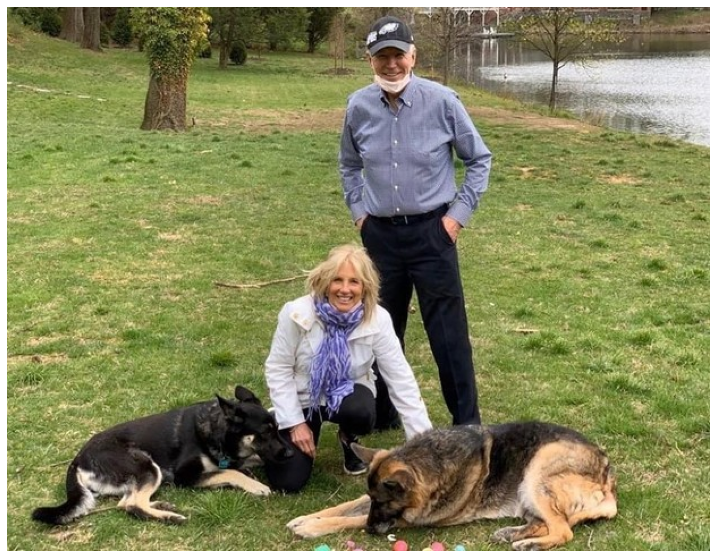

In [15]:
imagem = cv2.imread('../input/yolo-opencv-images/pictures/140370219_2849441738716160_6749933501072316755_n.jpg')
mostrar(imagem)

In [16]:
type(imagem)

numpy.ndarray

In [17]:
print(imagem)

[[[ 71 123 113]
  [ 74 124 114]
  [ 63 108  99]
  ...
  [ 55  69  81]
  [ 72  86  98]
  [ 78  92 104]]

 [[ 69 121 111]
  [ 66 116 106]
  [ 50  95  86]
  ...
  [ 52  68  80]
  [ 67  83  95]
  [ 73  89 101]]

 [[ 73 126 116]
  [ 84 136 126]
  [ 80 127 118]
  ...
  [ 38  59  67]
  [ 49  70  78]
  [ 51  72  80]]

 ...

 [[152 214 208]
  [135 197 191]
  [ 38 100  94]
  ...
  [ 77 136 115]
  [104 161 140]
  [ 86 143 122]]

 [[127 191 186]
  [127 191 186]
  [ 50 111 107]
  ...
  [103 160 139]
  [ 84 140 119]
  [ 36  92  71]]

 [[116 180 175]
  [ 85 149 144]
  [ 42 103  99]
  ...
  [126 183 162]
  [ 73 129 108]
  [ 15  68  48]]]


In [18]:
imagem_cp = imagem.copy()

In [19]:
imagem.shape

(480, 620, 3)

In [20]:
(H, W) = imagem.shape[:2]  
print('Altura: ' + str(H) + '\nLargura: ' + str(W))

Altura: 480
Largura: 620


In [21]:
inicio = time.time()

blob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416, 416), swapRB = True, crop = False)  
net.setInput(blob)                  
layer_outputs = net.forward(ln)

termino = time.time()
print('YOLO levou {:.2f} segundos'.format(termino - inicio))

YOLO levou 1.81 segundos


In [22]:
threshold = 0.5
threshold_NMS = 0.3   
caixas = []   
confiancas = []
IDclasses = []   

In [23]:
len(layer_outputs)

3

In [24]:
layer_outputs[0], len(layer_outputs[0])

(array([[0.00731378, 0.00835796, 0.01911554, ..., 0.        , 0.        ,
         0.        ],
        [0.01196912, 0.01583863, 0.02923485, ..., 0.        , 0.        ,
         0.        ],
        [0.01459108, 0.01538616, 0.05283243, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9915883 , 0.9902135 , 0.01942583, ..., 0.        , 0.        ,
         0.        ],
        [0.9867124 , 0.9838555 , 0.02732563, ..., 0.        , 0.        ,
         0.        ],
        [0.98293984, 0.9851328 , 0.04989635, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 8112)

In [25]:
layer_outputs[1]

array([[0.02848895, 0.03182862, 0.07085413, ..., 0.        , 0.        ,
        0.        ],
       [0.02946959, 0.0315248 , 0.1201526 , ..., 0.        , 0.        ,
        0.        ],
       [0.02860219, 0.0314269 , 0.12881216, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9672912 , 0.96702695, 0.06529035, ..., 0.        , 0.        ,
        0.        ],
       [0.96426   , 0.967151  , 0.0805693 , ..., 0.        , 0.        ,
        0.        ],
       [0.9658337 , 0.9672658 , 0.0971241 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [26]:
layer_outputs[2], layer_outputs[2][0], len(layer_outputs[2][0])

(array([[0.06746486, 0.06748697, 0.22886716, ..., 0.        , 0.        ,
         0.        ],
        [0.06057197, 0.06852353, 0.35892123, ..., 0.        , 0.        ,
         0.        ],
        [0.03607526, 0.05493551, 0.7739604 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9322988 , 0.93087256, 0.19279525, ..., 0.        , 0.        ,
         0.        ],
        [0.9324486 , 0.9312345 , 0.27114627, ..., 0.        , 0.        ,
         0.        ],
        [0.95132625, 0.9530785 , 0.55507535, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([6.7464858e-02, 6.7486972e-02, 2.2886716e-01, 1.9096354e-01,
        3.0702149e-06, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0

In [27]:
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [28]:
LABELS[16]

'dog'

In [29]:
np.argmax(np.array([0.10, 0.80, 0.10]))

1

In [30]:
teste = np.array([0.10, 0.80, 0.10])

In [31]:
teste[1]

0.8

In [32]:
for output in layer_outputs:
  for detection in output:
    scores = detection[5:]
    classeID = np.argmax(scores)
    confianca = scores[classeID]
    if confianca > threshold:
      print('scores: ' + str(scores))
      print('classe mais provável: ' + str(classeID))
      print('confiança: ' + str(confianca))

      caixa = detection[0:4] * np.array([W, H, W, H])
      (centerX, centerY, width, height) = caixa.astype('int')

      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))

      caixas.append([x, y, int(width), int(height)])
      confiancas.append(float(confianca))
      IDclasses.append(classeID)

scores: [0.617239 0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.      ]
classe mais provável: 0
confiança: 0.617239
scores: [0.9613269 0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.    

In [33]:
print(caixas), len(caixas)

[[285, 4, 142, 354], [291, -4, 138, 371], [284, 11, 144, 362], [292, 5, 138, 374], [290, 19, 139, 369], [225, 210, 151, 199], [224, 210, 156, 201], [225, 213, 153, 207], [224, 214, 156, 207], [22, 334, 219, 126], [23, 334, 217, 125], [17, 334, 262, 126], [19, 334, 258, 126], [246, 365, 290, 112], [240, 364, 297, 113], [288, 364, 256, 116], [286, 364, 258, 116], [244, 368, 291, 113], [291, 2, 136, 359], [290, 4, 138, 356], [291, 4, 136, 371], [291, 4, 137, 371], [225, 208, 150, 214], [225, 207, 149, 215], [19, 335, 233, 123], [19, 335, 235, 124], [21, 335, 250, 124], [21, 334, 251, 125], [245, 365, 296, 114], [244, 365, 297, 114]]


(None, 30)

In [34]:
print(confiancas), len(confiancas)

[0.6172389984130859, 0.9613268971443176, 0.9670418500900269, 0.9976795315742493, 0.6938307881355286, 0.7090282440185547, 0.828355610370636, 0.9035084843635559, 0.9415366649627686, 0.9899693727493286, 0.9895915389060974, 0.7117640376091003, 0.8270043134689331, 0.8166694045066833, 0.9438081979751587, 0.8103532195091248, 0.8627329468727112, 0.5343339443206787, 0.9637637734413147, 0.9585402011871338, 0.9974222779273987, 0.9973291158676147, 0.9814640879631042, 0.9799801707267761, 0.9887948036193848, 0.9883338212966919, 0.9301267862319946, 0.9261611700057983, 0.984443724155426, 0.9828097224235535]


(None, 30)

In [35]:
print(IDclasses), len(IDclasses)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 16, 16, 16, 16, 16, 16, 16, 16, 0, 0, 0, 0, 0, 0, 16, 16, 16, 16, 16, 16]


(None, 30)

In [36]:
objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS)

In [37]:
objs

array([ 3,  9, 28, 22], dtype=int32)

In [38]:
print(objs.flatten())

[ 3  9 28 22]


In [39]:
confiancas[7], confiancas[15], confiancas[11]

(0.9035084843635559, 0.8103532195091248, 0.7117640376091003)

In [40]:
confiancas[0]

0.6172389984130859

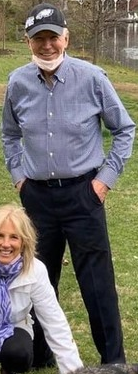

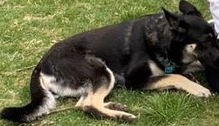

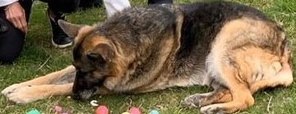

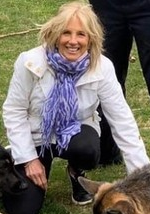

In [41]:
if len(objs) > 0:
  for i in objs.flatten():
    (x, y) = (caixas[i][0], caixas[i][1])
    (w, h) = (caixas[i][2], caixas[i][3])

    objeto = imagem_cp[y:y + h, x:x + w]
    cv2_imshow(objeto)

    cor = [int(c) for c in COLORS[IDclasses[i]]]

    cv2.rectangle(imagem, (x, y), (x + w, y + h), cor, 2)
    texto = "{}: {:.4f}".format(LABELS[IDclasses[i]], confiancas[i])
    cv2.putText(imagem, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2)

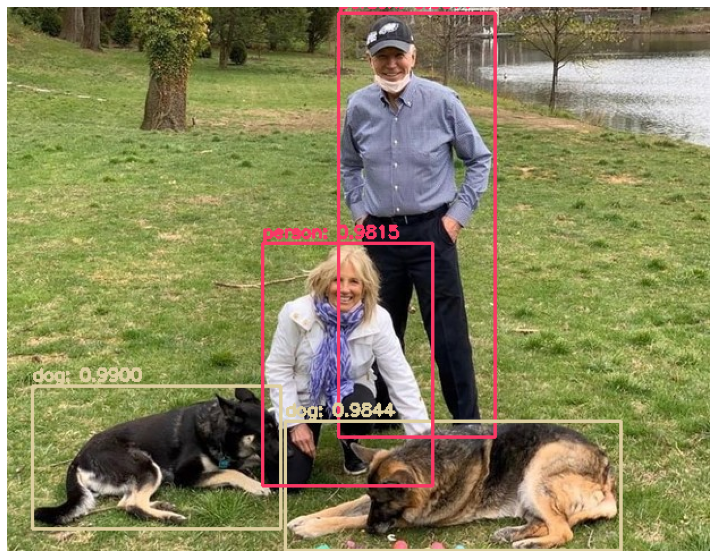

In [42]:
mostrar(imagem)

# **If you find this notebook useful, support with an upvote** 👍